# Optimum Interpolation Sea Surface Temperature (OISST)


https://www.ncdc.noaa.gov/oisst

Daily 1/4$^\circ$ global SST and sea ice thickness 

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy

import matplotlib.pyplot as plt

%matplotlib inline


/Users/beaird/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/beaird/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# get a single day

can be done via a thredds link like this one for August 1, 2019. 

```python
url = https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201908/avhrr-only-v2.20190801.nc
```
    
    


In [4]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201908/avhrr-only-v2.20190801.nc'

ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1, zlev: 1)
Coordinates:
  * time     (time) datetime64[ns] 2019-08-01
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * zlev     (zlev) float32 0.0
Data variables:
    ice      (time, zlev, lat, lon) float32 ...
    err      (time, zlev, lat, lon) float32 ...
    anom     (time, zlev, lat, lon) float32 ...
    sst      (time, zlev, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    history:                         Version 2.0
    creation_date:                   2019-08-16 11:15
    source_data:                     NCEP GTS,AVHRR19,MetOpA,NCEP ICE
    source:                          NOAA/National Centers for Environmental ...
    contact:                         oisst-help, email: oisst-help@noaa.gov
    DODS_

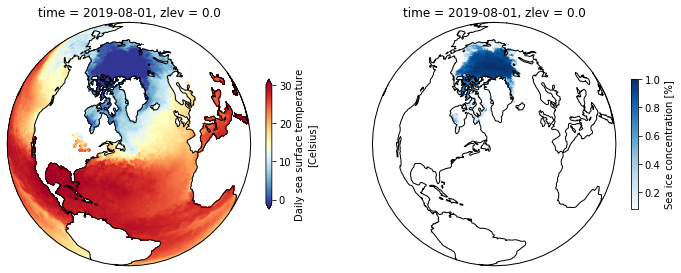

In [11]:
fig = plt.figure(figsize=(12,6))


ax1 = fig.add_subplot(1, 2,1,  projection=ccrs.Orthographic(central_longitude=-50, central_latitude=50))
ax1.coastlines()
ds.sst.plot(transform=ccrs.PlateCarree(), 
                                   vmin=-1, vmax=30, cmap='RdYlBu_r', cbar_kwargs={'shrink':0.4})

ax2 = fig.add_subplot(1, 2, 2,  projection=ccrs.Orthographic(central_longitude=-50, central_latitude=50))
ax2.coastlines()
ds.ice.plot(transform=ccrs.PlateCarree(),  cmap='Blues', cbar_kwargs={'shrink':0.4})

# open many days

You can systematically build a list of files for multiple days and load them using the multiple dataset opening xarray: `xarray.open_mfdataset()`. Ryan Abernathy has a nice example that I followed to learn about this on his course website: https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html. Thanks Ryan! 

In [16]:
# nov 6 - dec 1 2015

base_url = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.201605'

files = [f'{base_url}{str(day).zfill(2)}.nc' for day in range(11, 32)]
files

['https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160511.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160512.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160513.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160514.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160515.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160516.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160517.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160518.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160519.nc',
 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/201605/avhrr-only-v2.20160520.nc',


In [17]:

ds = xr.open_mfdataset(files)
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 21, zlev: 1)
Coordinates:
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * time     (time) datetime64[ns] 2016-05-11 2016-05-12 ... 2016-05-31
Data variables:
    sst      (time, zlev, lat, lon) float32 dask.array<shape=(21, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
    anom     (time, zlev, lat, lon) float32 dask.array<shape=(21, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
    err      (time, zlev, lat, lon) float32 dask.array<shape=(21, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
    ice      (time, zlev, lat, lon) float32 dask.array<shape=(21, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
Attributes:
    Conventions:    CF-1.0
    title:          Daily-OI-V2, Final, Data (Ship, Buoy, AVHRR: NOAA19, METO...
    History:        Version 2.0
    creation_date:  2016-07-01 23:22
    Descript

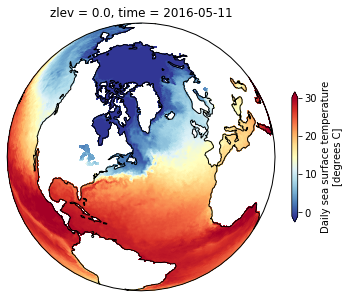

In [32]:

plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-50, central_latitude=50))
ax.coastlines()
ds.sst.sel(time='2016-05-11').plot(transform=ccrs.PlateCarree(), 
                                   vmin=-1, vmax=30, cmap='RdYlBu_r', cbar_kwargs={'shrink':0.4})



